In [31]:
import pandas as pd
docs = pd.read_table('SMSSpamCollection', header=None, names=['Class', 'sms'])
docs.head()


,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
#df.column_name.value_counts() - gives no. of unique inputs in that columns
docs.Class.value_counts()

ham     4825
spam     747
Name: Class, dtype: int64

In [33]:
ham_spam=docs.Class.value_counts()
ham_spam

ham     4825
spam     747
Name: Class, dtype: int64

In [4]:
print("Spam % is ",(ham_spam[1]/float(ham_spam[0]+ham_spam[1]))*100)

Spam % is  13.4063173008


In [35]:
# mapping labels to 1 and 0
docs['label'] = docs.Class.map({'ham':0, 'spam':1})

In [36]:
docs.head()

,Class,sms,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [37]:
X=docs.sms
y=docs.label

In [38]:
X = docs.sms
y = docs.label
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [39]:
# splitting into test and train

from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [43]:
X_train.head()

710     4mths half price Orange line rental & latest c...
3740                           Did you stitch his trouser
2711    Hope you enjoyed your new content. text stop t...
3155    Not heard from U4 a while. Call 4 rude chat pr...
3748    Ü neva tell me how i noe... I'm not at home in...
Name: sms, dtype: object

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorising the text
vect = CountVectorizer(stop_words='english')

In [45]:
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [13]:
vect.vocabulary_

{'romantic': 5415,
 'nan': 4378,
 'dhoni': 2157,
 'wow': 7083,
 'tunji': 6575,
 'excuses': 2518,
 'operate': 4611,
 'resent': 5333,
 'aberdeen': 729,
 'proof': 5076,
 'work': 7058,
 'wewa': 6954,
 'satisfied': 5504,
 'atm': 1059,
 'brings': 1416,
 'lage': 3734,
 'matrix3': 4101,
 'birds': 1270,
 '1win150ppmx3': 329,
 'keeps': 3652,
 'zoom': 7199,
 'erutupalam': 2469,
 '447797706009': 482,
 'or2stoptxt': 4624,
 'room': 5418,
 'sense': 5595,
 '09066362231': 219,
 'frens': 2791,
 'monoc': 4276,
 'loveme': 3957,
 'right': 5383,
 'yes': 7160,
 'loses': 3936,
 'crickiting': 1958,
 'gprs': 2998,
 'hmph': 3229,
 'leadership': 3785,
 'box326': 1365,
 'freaking': 2777,
 'zoe': 7198,
 'navigate': 4399,
 'tall': 6240,
 'enjoyin': 2437,
 '09050000928': 156,
 'judgemental': 3609,
 'lf56': 3820,
 'getsleep': 2911,
 'mrt': 4313,
 'premium': 5002,
 'tattoos': 6256,
 'slower': 5792,
 'name1': 4373,
 '08707808226': 86,
 'city': 1715,
 '2yr': 410,
 'sent': 5598,
 'okies': 4583,
 'temple': 6299,
 'sweets':

In [14]:
vect.get_feature_names()

['00',
 '000',
 '008704050406',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07090201529',
 '07090298926',
 '07123456789',
 '07732584351',
 '07734396839',
 '07742676969',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448714184',
 '0845',
 '08450542832',
 '08452810071',
 '08452810073',
 '08452810075over18',
 '0870',
 '08700435505150p',
 '08700469649',
 '08700621170150p',
 '08

In [46]:
# transform
X_train_transformed = vect.transform(X_train)
X_test_tranformed =vect.transform(X_test)

In [47]:
from sklearn.naive_bayes import BernoulliNB

# instantiate bernoulli NB object
bnb = BernoulliNB()

# fit 
bnb.fit(X_train_transformed,y_train)

# predict class
y_pred_class = bnb.predict(X_test_tranformed)

# predict probability
y_pred_proba =bnb.predict_proba(X_test_tranformed)

# accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)


0.97702799712849964

In [48]:
bnb

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [49]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[1207,    1],
       [  31,  154]])

In [50]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[1207    1]
 [  31  154]]


In [51]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.832432432432


In [52]:
specificity = TN / float(TN + FP)

print("specificity",specificity)

specificity 0.99917218543


In [53]:
precision = TP / float(TP + FP)

print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

precision 0.993548387097
0.993548387097


In [55]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

precision 0.993548387097
PRECISION SCORE : 0.993548387097
RECALL SCORE : 0.832432432432
F1 SCORE : 0.905882352941


In [24]:
y_pred_proba

array([[  1.00000000e+00,   1.54647985e-10],
       [  1.00000000e+00,   1.69177313e-10],
       [  9.99999997e-01,   2.52488636e-09],
       ..., 
       [  9.99994219e-01,   5.78141360e-06],
       [  3.64570741e-06,   9.99996354e-01],
       [  1.00000000e+00,   2.90374743e-12]])

In [56]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [26]:
print (roc_auc)

0.996769285842


In [57]:
print(true_positive_rate)

[ 0.25405405  0.28648649  0.2972973   0.3027027   0.32432432  0.6
  0.61081081  0.61621622  0.62702703  0.68648649  0.6972973   0.74054054
  0.74054054  0.76216216  0.77297297  0.83243243  0.83243243  0.85945946
  0.85945946  0.87567568  0.87567568  0.92972973  0.92972973  0.94594595
  0.94594595  0.95135135  0.95135135  0.96216216  0.96216216  0.96756757
  0.96756757  0.97297297  0.97297297  0.97297297  0.97297297  0.97837838
  0.97837838  0.99459459  0.99459459  0.99459459  0.99459459  1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.  

In [58]:
print(false_positive_rate)

[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   8.27814570e-04   8.27814570e-04   8.27814570e-04   8.27814570e-04
   1.65562914e-03   1.65562914e-03   2.48344371e-03   2.48344371e-03
   3.31125828e-03   3.31125828e-03   4.13907285e-03   4.13907285e-03
   5.79470199e-03   5.79470199e-03   7.45033113e-03   7.45033113e-03
   8.27814570e-03   8.27814570e-03   1.57284768e-02   1.57284768e-02
   4.63576159e-02   4.80132450e-02   7.11920530e-02   7.11920530e-02
   9.27152318e-02   9.27152318e-02   9.43708609e-02   9.60264901e-02
   1.28311258e-01   1.28311258e-01   2.14403974e-01   2.16059603e-01
   2.20198675e-01   2.23509934e-01   2.31788079e-01   2.34271523e-01
   2.47516556e-01   2.49172185e-01   2.65728477e-01   2.69039735e-01
   2.77317881e-01   2.78973510e-01   2.90562914e-01   2.92218543e-01
   3.00496689e-01   3.02980132e-01

In [59]:
print(thresholds)

[  1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
   1.00000000e+00   9.99997890e-01   9.99996354e-01   9.99995019e-01
   9.99994956e-01   9.99331659e-01   9.99303596e-01   9.95870863e-01
   9.95462919e-01   9.89588895e-01   9.84971101e-01   5.45317784e-01
   2.10969418e-01   8.10085802e-02   5.71073030e-02   2.90086028e-02
   2.35876189e-02   9.51989482e-05   8.90802044e-05   7.07278806e-05
   4.70943921e-05   4.61263360e-05   1.55662920e-05   1.08401730e-05
   8.99660467e-06   6.09486970e-06   1.09724378e-06   8.28411345e-07
   4.96407211e-08   4.47105639e-08   2.06982466e-08   2.05911266e-08
   1.19010796e-08   1.14871194e-08   1.08372483e-08   1.08303547e-08
   5.09956933e-09   5.05703149e-09   1.68232631e-09   1.65630671e-09
   1.57483042e-09   1.57290293e-09   1.47852794e-09   1.47818462e-09
   1.26916365e-09   1.26104629e-09   1.05260899e-09   1.04831205e-09
   9.61532075e-10   9.60797541e-10   8.47442362e-10   8.46842727e-10
   7.92713879e-10   7.90831112e-10

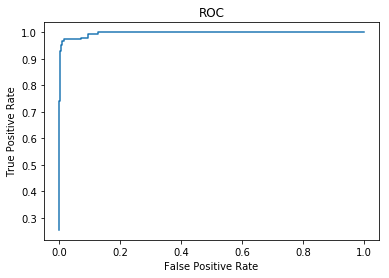

In [60]:
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)